In [4]:
import numpy as np

In [5]:
import torch

In [6]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
from sklearn.decomposition import IncrementalPCA
X, y = mnist['data'], mnist['target']
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
n_batches = 100

incremental_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    incremental_pca.partial_fit(X_batch)

In [8]:
X_reduced = incremental_pca.transform(X_train)

In [10]:
X_reduced.shape

(60000, 154)

In [11]:
X_recovered = incremental_pca.inverse_transform(X_reduced)

In [13]:
X_recovered.shape

(60000, 784)

In [14]:
X_recovered = X_recovered.reshape(60000, 28,-1)
import matplotlib.pyplot as plt

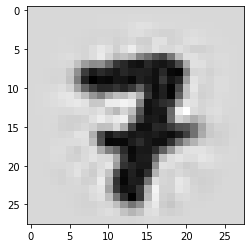

In [18]:
plt.imshow(X_recovered[950],cmap="binary")

In [19]:
X_reduced.shape

(60000, 154)

In [20]:
X_reduced_some = X_reduced[:, :144]

In [21]:
X_reduced_some.shape

(60000, 144)

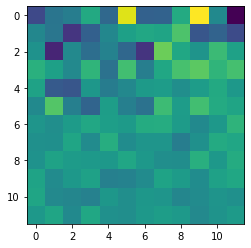

In [23]:
X_reduced_img = X_reduced_some.reshape(60000, 12,-1)
plt.imshow(X_reduced_img[100])
# image is not preserved but variance is jut preserved by looking at the result